In [60]:
import yfinance as yf
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import datetime as dt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
end_date = dt.date.today()
start_date = end_date- dt.timedelta(days=365)
aapl = yf.download(['AAPL'], start=start_date, end=end_date)
print(aapl.columns)

[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


2.723328503365104


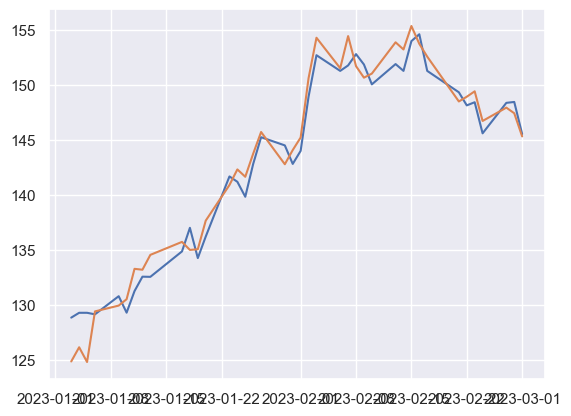

In [77]:
cutoff = end_date - dt.timedelta(days=60)
df = aapl.sort_index()
df = df.loc[:, df.columns != 'Close']
df = df.loc[:, df.columns != 'Volume']
train = df[start_date:cutoff]
test = df[cutoff:end_date]
train_features = train.loc[:, df.columns != 'Adj Close']
train_labels = train['Adj Close']
test_features = test.loc[:, df.columns != 'Adj Close']
test_labels = test['Adj Close']

model = KNeighborsRegressor()
model.fit(train_features, train_labels)
pred = model.predict(test_features)

print(mean_squared_error(y_true=test_labels, y_pred=pred))

plt.plot(test.index.values, pred)
plt.plot(test.index.values, test_labels)